

# Project: Investigate a Dataset - TMDb_movie_data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> TMDb_movie_data is a dataset of 10000 movie from the year 1960 to 2015 
> This dataset was generated from The Movie Database API. This product uses the TMDb API but is not endorsed or certified by TMDb.


### Question(s) for Analysis
> Which Year was the most succesful year in Holywood in Terms of Revenues, Budget and Popularity ? and what are the changes of Revenues, budget , profit and poupularity over the years ?

> Which actors,Genres,directors and movie duration that will help movie profits to exceed 100 million dollars ? and the correlation between movie duration and profits ?

In [1]:
# import all of the packages that I will use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams


In [2]:
# Loaded my Data and Checked if It's Correctely loaded.
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

In [3]:
# to check for the number of columns and rows 
df.shape

(10866, 21)

In [4]:
# to check for the data types and any problem
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# to check for the values in the Table and make sure there is no wrong values like zero 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# After Checking the Data we will start by droping all the columns that we don't need
df.drop(['id' , 'imdb_id' , 'budget' , 'revenue', 'production_companies' , 'homepage' , 'tagline' , 'keywords','overview','release_date','vote_count','vote_average'],axis=1,inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 764.1+ KB



### Data Cleaning


In [7]:
#after That we have to remove zero values in the Budget, Revenue and runtime
df = df[df.budget_adj != 0]
df = df[df.revenue_adj != 0]
df = df[df.runtime != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 9 columns):
popularity        3855 non-null float64
original_title    3855 non-null object
cast              3851 non-null object
director          3854 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(3), int64(2), object(4)
memory usage: 301.2+ KB


In [8]:
# Checking for NAN values 
df.isnull().any().sum()

2

In [9]:
# Deleting the row with NAN values 
df.dropna(axis=0 , inplace=True)

In [10]:
# Checking again for NAN values 
df.isnull().any().sum()

0

In [11]:
# Creating a new column to Calculate the profit 
df['profit'] = df['revenue_adj'] - df['budget_adj']

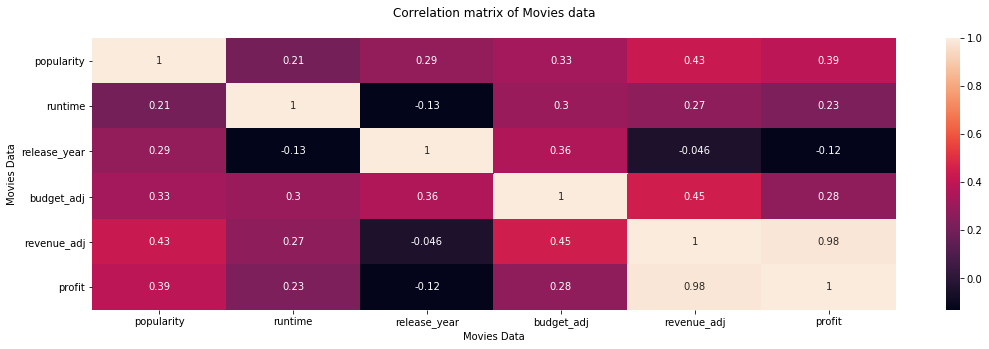

In [33]:
# Creating a heat map to identify the correltion between the Variables 
d = sns.heatmap(df.corr(), annot = True);

d.set(xlabel='Movies Data', ylabel='Movies Data', title = "Correlation matrix of Movies data\n");


#### We can figure the following : 
> - We Can figrue out that there is a medium correlation between revenues and popularity
> - Another correlation between release year and cost
> - While negative correlation between release year and profits
> - Also a correlation between runtime and poularity and runtime and profits 

In [13]:
# Final check for our data before starting .. 
df.head()

,popularity,original_title,cast,director,runtime,genres,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09,1.210949e+09


<a id='eda'></a>
## Exploratory Data Analysis




### Which Year was the most succesful year in Holywood in Terms of Revenues, Budget and Popularity ? and what are the changes of Revenues, budget , profit and poupularity over the years ?  

In [14]:
# First We need to Group by the mean of the Years 
df_ry = df.groupby('release_year').mean()
df_ry.head(5)

,popularity,runtime,budget_adj,revenue_adj,profit
release_year,,,,,
1960,1.324513,130.000000,3.068179e+07,1.902299e+08,1.595481e+08
1961,0.787718,132.500000,2.818516e+07,2.463622e+08,2.181770e+08
1962,0.983485,141.285714,4.062476e+07,2.124740e+08,1.718493e+08
1963,1.040612,153.500000,7.252496e+07,2.094838e+08,1.369589e+08
1964,1.377790,122.428571,3.408189e+07,3.300344e+08,2.959526e+08


In [15]:
# Now we will create a function to identify the max year in terms of columns   
def max_data(column):
    max_year_data = df_ry[df_ry[column] == df_ry[column].max()]
    return max_year_data
max_data('popularity')

,popularity,runtime,budget_adj,revenue_adj,profit
release_year,,,,,
2015,2.856943,110.86875,4.123195e+07,1.506667e+08,1.094348e+08


> Seems that the highest year in terms of popularity is 2015 with average 2.85

In [16]:
# in terms of revenue
max_data('revenue_adj')

,popularity,runtime,budget_adj,revenue_adj,profit
release_year,,,,,
1965,1.054877,167.6,8.138583e+07,6.340369e+08,5.526511e+08


> It seems That 1965 was the highest year with average revenue six hundred thirty-four million thirty-six thousand nine hundred dollars

In [17]:
# in terms of cost
max_data('budget_adj')

,popularity,runtime,budget_adj,revenue_adj,profit
release_year,,,,,
1965,1.054877,167.6,8.138583e+07,6.340369e+08,5.526511e+08


> It seems That also 1965 was the highest year with average cost eighty-one million three hundred eighty-five thousand eight hundred thirty dollars 

In [18]:
#in terms of profit
max_data('profit')

,popularity,runtime,budget_adj,revenue_adj,profit
release_year,,,,,
1965,1.054877,167.6,8.138583e+07,6.340369e+08,5.526511e+08


> It seems That also 1965 was the highest year in terms of profit with average profit five hundred fifty-two million six hundred fifty-one thousand one hundred dollars 

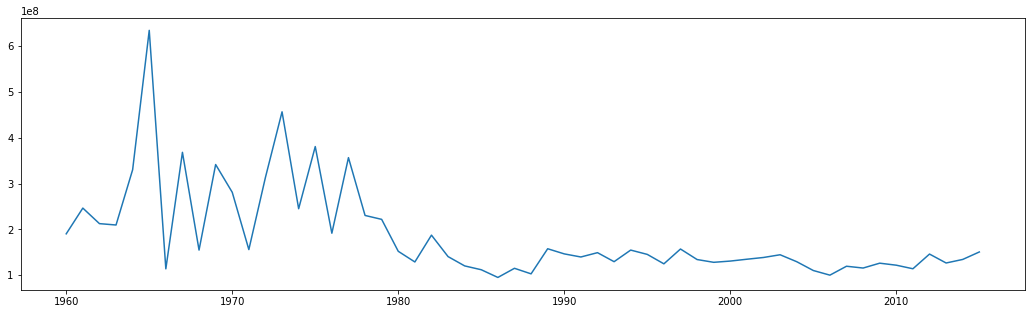

In [34]:
#Now we will do it in terms of revenue 
plt.plot(df_ry['revenue_adj']);

> A graph That shows the change of revenues from 1960 to 2015 

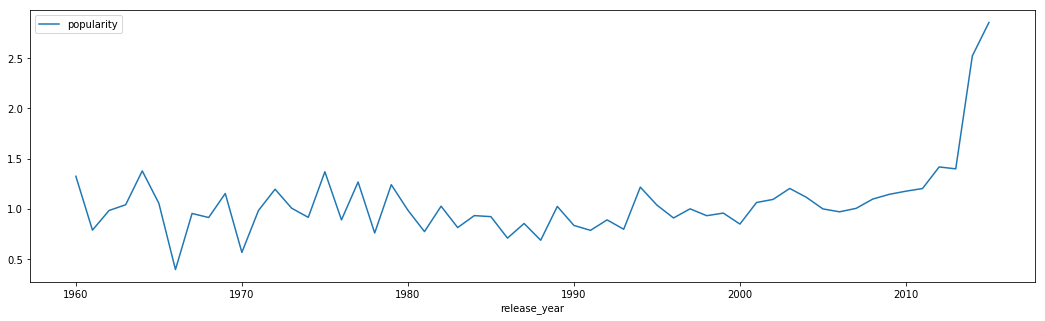

In [35]:
# Now we will Draw A Chart for the progress of years in terms of Popularity 
df_ry.plot(y='popularity');

> A graph That shows the change of popularity from 1960 to 2015 

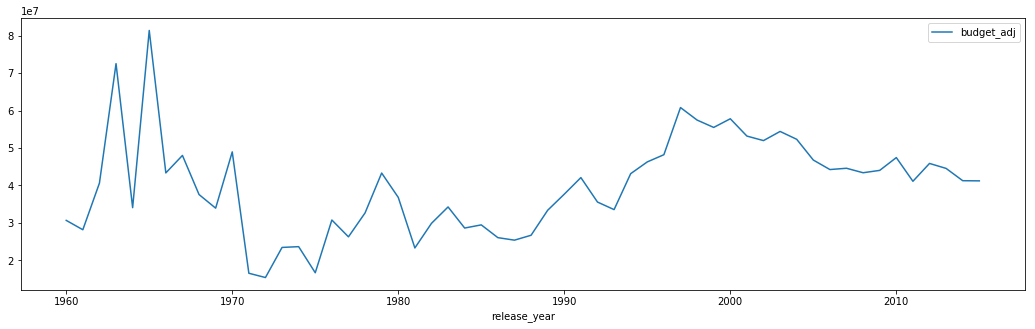

In [36]:
# Now in terms of Cost 
df_ry.plot(y='budget_adj');

> > A graph That shows the change of cost from 1960 to 2015 

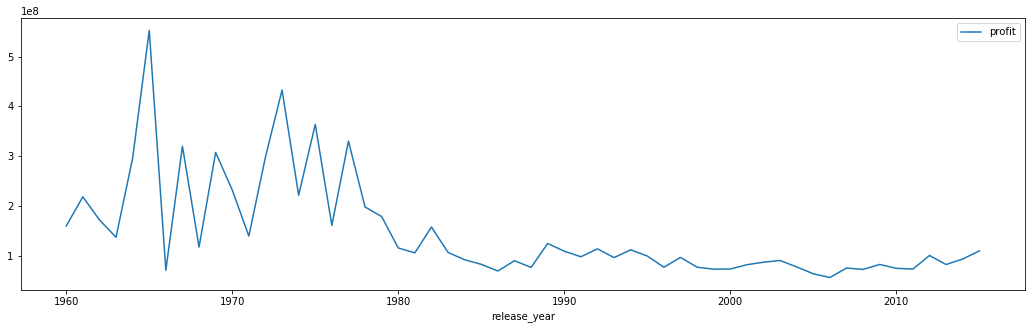

In [37]:
#now in terms of profit
df_ry.plot(y='profit');

> A graph That shows the change of profits from 1960 to 2015 

   ### Which actors,Genres,director and movie duration that will help movie profits to exceed 100 million dollars ? and the correlation between movie duration and both profits and popularity ?

In [23]:
#First we will Start with movies with profits more than 100 millions 
df = df[df['profit'] > 100000000]
# Creating a function that get count of participation of each element in the movies   
def clean(column):
    df_data = df[column]
    # spliting Data by '|'
    df_data = df_data.apply(lambda x: x.split('|'))
    # Creating a new dataframe with each value in a column 
    split_data = pd.DataFrame(df_data.tolist())
    # Creating a list to add all the values of the 5 columns to it 
    df_count = []
    # Creating a for loop to add all the items to the list 
    for i in split_data.columns:
        split_data[i].apply(lambda x: df_count.append(x))
    # Transforming the list to data frame to get the counts of elements    
    df_count = pd.DataFrame(df_count)
    return df_count[0].value_counts()



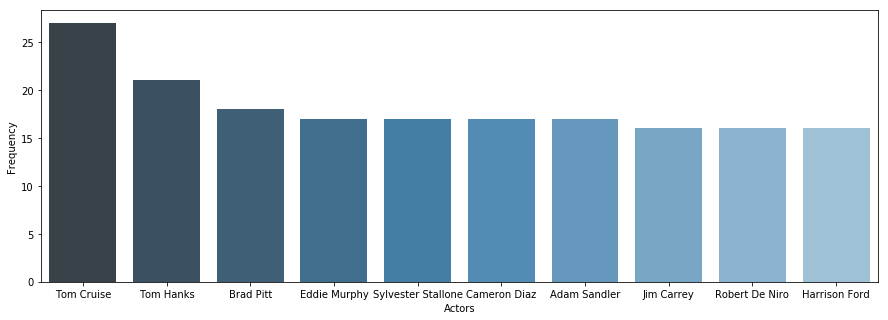

In [38]:
# First we will start with the Actors by identifing the Top 10 Actors that particpate in
# a movie with more than 100 million dollars 
def final(column):
    #getting the top 10 actors 
    top_10 = pd.DataFrame(clean(column).head(10))
    #Changing Actors from index to a column 
    top_10.reset_index(inplace=True)
    return top_10
#Changing Actors from index to a column 
top_10 = final('cast')
top_10.rename(columns = {'index':'Actor'}, inplace = True)
#Drawing a graph to represent the number of apperance that actors 
rcParams['figure.figsize'] = 15,5
C = sns.barplot(x = 'Actor',y = top_10[0],data = top_10, palette="Blues_d" );
C.set( xlabel = "Actors", ylabel = "Frequency");

> A graph that shows the frequency of Top 10 Actors apperance , You have to hire one of these actors to your film [Tom Cruise , Tom Hanks , Brad Pitt , Sylvester Stallone , Cameron Diaz , Adam Sandler , Eddie Murphy , Robert De Niro , Bruce Willis , Jim Carrey]

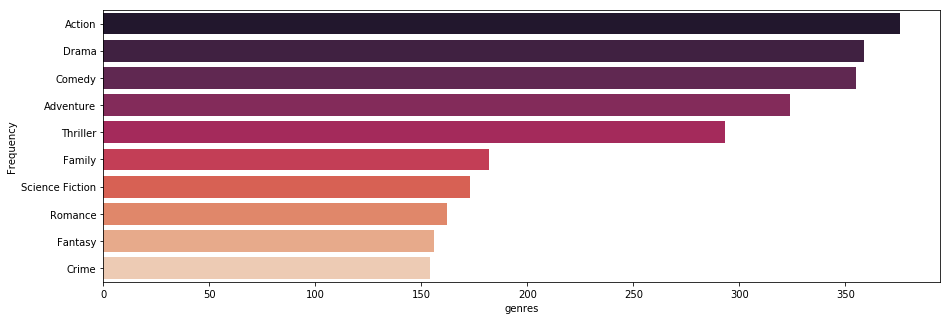

In [39]:
# we will do the same with genres 
top_10 = final('genres')
top_10.rename(columns = {'index':'genres'}, inplace = True)
# now we will show the genres in graph 
rcParams['figure.figsize'] = 15,5
G = sns.barplot(y = 'genres',x = top_10[0],data = top_10, palette="rocket" );
G.set( xlabel = "genres", ylabel = "Frequency");

> A Graph that represents the Frequency of each Genres , Make your movie with Genre Action , drama and a little bit Comedy for the 100 Million dollars :) 

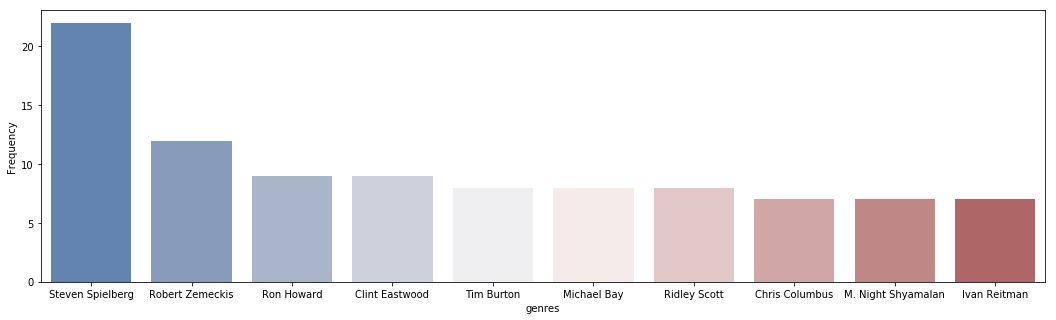

In [40]:
# one more time for the director 
top_10 = final('director')
top_10.rename(columns = {'index':'director'}, inplace = True)
# now we will show the director in a graph 
rcParams['figure.figsize'] = 18,5
D = sns.barplot(x = 'director',y = top_10[0],data = top_10, palette="vlag" );
D.set( xlabel = "genres", ylabel = "Frequency");

>A graph that shows Top 10 directors participation on movies with profit 100 million dollars, and we will choose one of these two [Steven Spielbreg , Robert Zemeckis] 

In [27]:
# now we will calculate the correltion between Profits and run time
df['profit'].corr(df['runtime'])

0.23061187311239711

> The correltion between profits and runtime is 0.2306 

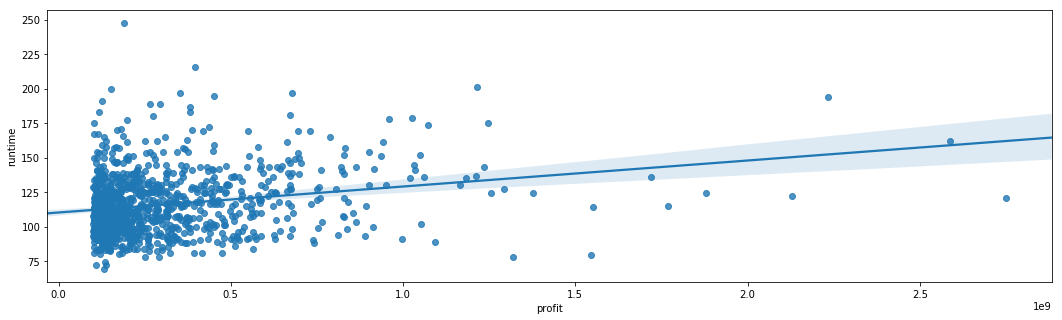

In [28]:
# Now we will graph it 
sns.regplot(x=df["profit"], y=df["runtime"]);

> A graph to Show the Correlation between profit and runtime 

In [29]:
# we can also calculate the correltion between Popularity and run time
df['popularity'].corr(df['runtime'])

0.20625278243963538

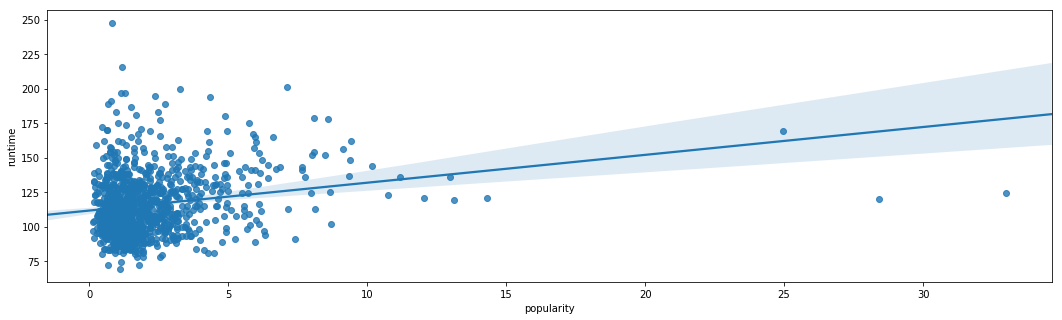

In [30]:
# Now we will graph it 
sns.regplot(x=df["popularity"], y=df["runtime"]);

>A graph to Show the Correlation between profit and runtime 

In [31]:
# finaly we are going to see the average run time of the movie 
print('Your Movie should be {} min'.format(df['runtime'].mean().astype(int)))

Your Movie should be 116 min


>Finally Your Movie should be around 116 min 

<a id='conclusions'></a>
## Conclusions

#### First Question : Which Year was the most succesful year in Holywood in Terms of Revenues, Budget and Popularity ? and what are the changes of Revenues, budget , profit and poupularity over the years ? 
> - Seems that the highest year in terms of popularity is 2015 with average 2.85
> - It seems That 1965 was the highest year in terms of revenue with average revenue six hundred thirty-four million thirty-six thousand nine hundred dollars
> - It seems That also 1965 was the highest year with average cost eighty-one million three hundred eighty-five thousand eight hundred thirty dollars 
> - It seems That also 1965 was the highest year in terms of profit with average profit five hundred fifty-two million six hundred fifty-one thousand one hundred dollars 
> - And finally the Graghs illustrate the change over years 
#### Second Question : Which actors,Genres,director and movie duration that will help movie profits to exceed 100 million dollars ? and the correlation between movie duration and profits ?
> - You have to hire one of these actors to your film [Tom Cruise , Tom Hanks , Brad Pitt , Sylvester Stallone , Cameron Diaz , Adam Sandler , Eddie Murphy , Robert De Niro , Bruce Willis , Jim Carrey] 
> - Make your movie with Genre Action , drama and a little bit Comedy 
> - Directed by one of these two [Steven Spielbreg , Robert Zemeckis] 
> - Finally Your Movie should be around 116 min 
## Limitations 
>- The dataset is for movies from the year 1960 to 2015
>- In the second question there are sevral factors that affect the profit I just listed some of them

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0